# AE1, Queen's Gambit

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
#This cell imports all the libraries that I will use.

# Who are the youngest players to hold the title of Grand Master (GM) and Woman Grand Master (WGM)?

In [23]:
df = pd.read_csv("players-1.csv") #It reads the csv file  
#Code source: https://www.w3schools.com/python/pandas/pandas_csv.asp

In [13]:
df_1 = df[(df['title'] == 'GM')]#It filter the data by title.
#Code Source: https://note.nkmk.me/en/python-pandas-multiple-conditions/

In [14]:
maxyob_GM = df_1['yob'].max() #it find the highest value for yob which its the youngest year of birth.
maxyob_GM

2006

In [15]:
youngest_GM = df_1[(df_1['yob'] == 2006)] #It filter the data by title and year of birth 
youngest_GM 

,fide_id,name,federation,gender,title,yob
413917,46616543,Gukesh D,IND,M,GM,2006


In [16]:
df_2 = df[(df['title'] == 'WGM')]

In [17]:
maxyob_WGM = df_2['yob'].max()
maxyob_WGM

2004

In [18]:
youngest_WGW = df_2[(df_2['yob'] == 2004)]
youngest_WGW

,fide_id,name,federation,gender,title,yob
364425,34127035,"Garifullina, Leya",RUS,F,WGM,2004


In the given data set, the youngest Woman Grand Master (WGM) is Garifullina Leya, and the youngest Grand Master (GM) is Gukesh.

# What is their career progress (in terms of ratings) to date? Visualise the two masters’ ratings over time, per game; compare and contrast them.

In [2]:
ratings = pd.concat(map(pd.read_csv, ['2016.csv',
                                      '2017.csv','2018.csv',
                                      '2019.csv','2020.csv','2021.csv'])) # It concatenate all csv files together.

In [3]:
ratings.to_csv("combined_files.csv", index = False)
ratings = pd.read_csv('combined_files.csv')
#Code Source: http://net-informations.com/ds/pda/multiple.htm

In [4]:
def read(txtall):
    y = pd.read_fwf(txtall)
    game = txtall.split("_")
    y = y.rename(columns={game[1][0:5].upper():"rating_" + game[0]}) 
    if game [1][0:3] == "jan":
        y["month"] = 1
    elif game [1][0:3] == "feb":
        y["month"] = 2
    elif game[1][0:3] == "mar":
        y["month"] = 3
    elif game[1][0:3] == "apr":
        y["month"] = 4
    elif game [1][0:3] =="may":
        y["month"] = 5
    elif game[1][0:3] == "jun":
        y["month"] = 6
    elif game [1][0:3] == "jul": #It creates a loop to align months and years in order. 
        y["month"] = 7 
    elif game[1][0:3] == "aug":
        y["month"] = 8
    elif game [1][0:3] == "sep":
        y["month"] = 9
    elif game [1][0:3] == "oct":
        y["month"] = 10
    elif game [1][0:3] == "nov":
        y["month"] = 11 
    else:
        y["month"] = 12 
    if game [1][3:5] == "21":
        y["year"] = 2021
    else:
        y["year"] = 2022
    return y
           
txtall = ["standard_may21frl.txt", "blitz_may21frl.txt", "rapid_may21frl.txt", #list of the file.
        "standard_jun21frl.txt", "blitz_jun21frl.txt", "rapid_jun21frl.txt",
        "standard_jul21frl.txt", "blitz_jul21frl.txt", "rapid_jul21frl.txt", 
        "standard_aug21frl.txt", "blitz_aug21frl.txt",  "rapid_aug21frl.txt",
        "standard_sep21frl.txt", "blitz_sep21frl.txt", "rapid_sep21frl.txt",
        "standard_oct21frl.txt", "blitz_oct21frl.txt", "rapid_oct21frl.txt",
        "standard_nov21frl.txt", "blitz_nov21frl.txt", "rapid_nov21frl.txt",
        "standard_dec21frl.txt", "blitz_dec21frl.txt", "rapid_dec21frl.txt",
        "standard_jan22frl.txt", "blitz_jan22frl.txt","rapid_jan22frl.txt",
        "blitz_feb22frl.txt",  "rapid_feb22frl.txt" ,"standard_mar22frl.txt",
        "rapid_mar22frl.txt", "standard_apr22frl.txt", "blitz_apr22frl.txt",
        "standard_may22frl.txt", "rapid_may22frl.txt", "blitz_may22frl.txt",
        "rapid_jun22frl.txt", "blitz_jun22frl.txt", "standard_jul22frl.txt",
        "blitz_jul22frl.txt",  "standard_aug22frl.txt", "rapid_aug22frl.txt",
        "standard_sep22frl.txt", "rapid_sep22frl.txt",  "blitz_sep22frl.txt",
        "rapid_oct22frl.txt", "blitz_oct22frl.txt", "standard_nov22frl.txt",
        "blitz_nov22frl.txt","standard_dec22frl.txt","rapid_dec22frl.txt",
        "standard_feb22frl.txt","blitz_mar22frl.txt", "rapid_apr22frl.txt",
        "standard_jun22frl.txt", "rapid_jul22frl.txt",  "blitz_aug22frl.txt",
        "standard_oct22frl.txt","rapid_nov22frl.txt" ,"blitz_dec22frl.txt"]

dfs = list(map(read, txtall))
df_22 = pd.concat(dfs)
all_list = [ratings, df_22]
full_ratings = pd.concat(all_list) 
#Code Source: Coursemate. However, I did some changes.

In [5]:
full_ratings[['fide_id','ID Number']] = full_ratings[['fide_id','ID Number']].fillna(0) #It fills the Nan values into 0 only for two colomns.
sum = full_ratings['fide_id'] + full_ratings['ID Number']  #It sum the ID number with the fide id by creating a new colomn with the full IDS.  
full_ratings['ID PLAYER'] = full_ratings['fide_id'] + full_ratings['ID Number']
full_ratings = full_ratings.drop(columns = ['fide_id', 'ID Number']) #It drops the extra Id column.

In [6]:
full_ratings

,year,month,rating_standard,rating_rapid,rating_blitz,Name,Fed,Sex,Tit,WTit,OTit,FOA,Gms,K,B-day,Flag,ID PLAYER
0,2016,1,2466.0,2432.0,2414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100013.0
1,2016,1,2422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100021.0
2,2016,1,1607.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100048.0
3,2016,1,2116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100064.0
4,2016,1,2410.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100072.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174973,2022,12,NaN,NaN,2131.0,"Zyuzin, Andrey",RUS,M,NaN,NaN,NaN,NaN,0.0,20.0,1977.0,i,34271228.0
174974,2022,12,NaN,NaN,1633.0,"Zyuzin, Boris",RUS,M,NaN,NaN,NaN,NaN,0.0,20.0,1963.0,i,34478620.0
174975,2022,12,NaN,NaN,1261.0,"Zyuzina, Marina",RUS,F,NaN,NaN,NaN,NaN,0.0,40.0,2004.0,w,55755011.0
174976,2022,12,NaN,NaN,1387.0,"Zywczak, Damian",POL,M,NaN,NaN,NaN,NaN,0.0,20.0,1993.0,i,21054274.0


In [24]:
df_3 = full_ratings[(full_ratings['ID PLAYER'] == 46616543)]
df_4 = full_ratings[(full_ratings['ID PLAYER'] == 34127035)]

In [27]:
column = ['year', 'month'] #It refer to the year and month column 
df_3['date'] = pd.to_datetime(df_3[column].apply(lambda v: '-'.join(v.values.astype(str)), axis=1))# use the datatime function to create complete date column
column = ['year', 'month'] #It refer to the year and month column 
df_4['date'] = pd.to_datetime(df_4[column].apply(lambda v: '-'.join(v.values.astype(str)), axis=1))

/var/folders/tp/hw74g7jj5yx_h2wvpnjcg_t00000gn/T/ipykernel_64124/3831570798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['date'] = pd.to_datetime(df_3[column].apply(lambda v: '-'.join(v.values.astype(str)), axis=1))# use the datatime function to create complete date column
/var/folders/tp/hw74g7jj5yx_h2wvpnjcg_t00000gn/T/ipykernel_64124/3831570798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['date'] = pd.to_datetime(df_4[column].apply(lambda v: '-'.join(v.values.astype(str)), axis=1)

Text(0.5, 1.0, 'Woman Grand Master (WGM) Garifullina Leya ratings')

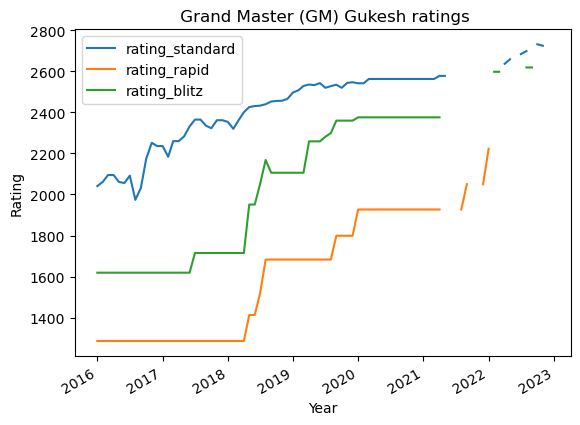

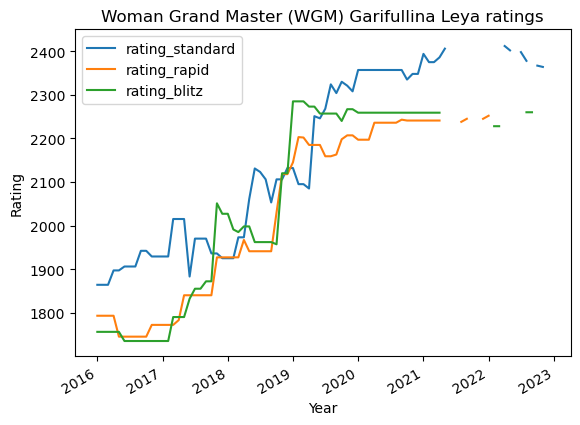

In [28]:
df_3.plot(x='date', y=['rating_standard','rating_rapid','rating_blitz'])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title(" Grand Master (GM) Gukesh ratings", color = 'black')
df_4.plot(x='date', y=['rating_standard','rating_rapid','rating_blitz'])#The code its setting the x as year and y as 'ratings' by calling the csv's colomns with its values.  
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Woman Grand Master (WGM) Garifullina Leya ratings", color = 'black') #It set the title and the colour of the title. 

The graph shows the ratings for the youngest GM, Gukesh and the youngest WGW, Garifullina Leya. 

/var/folders/tp/hw74g7jj5yx_h2wvpnjcg_t00000gn/T/ipykernel_64124/1716239814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[['rating_standard']] = df_3[['rating_standard']].fillna(method='ffill') #There are some missing data on the data set. Thus, I gave them an arbritary value based upon the precedent value. The graph will look messy but we still have an apporoximate idea of the rating.
/var/folders/tp/hw74g7jj5yx_h2wvpnjcg_t00000gn/T/ipykernel_64124/1716239814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

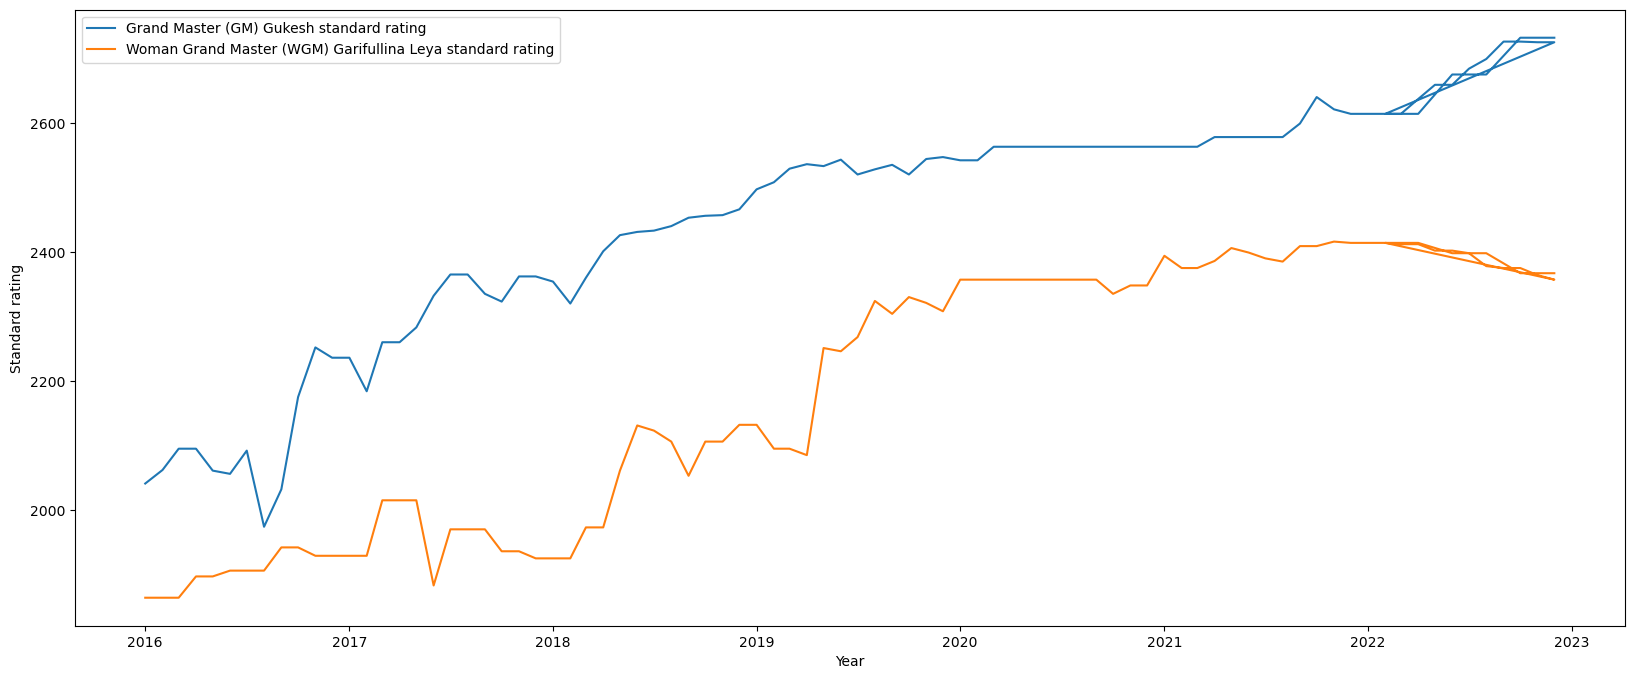

In [29]:
df_3[['rating_standard']] = df_3[['rating_standard']].fillna(method='ffill') #There are some missing data on the data set. Thus, I gave them an arbritary value based upon the precedent value. The graph will look messy but we still have an apporoximate idea of the rating.
df_4[['rating_standard']] = df_4[['rating_standard']].fillna(method='ffill')


Grand_Master = df_3 #it set a varible = to the csv file which its filetered by a player ID. 
Woman_Grand_Master = df_4 #it set a varible = to the csv file which its filetered by a player ID.
Grand_Master_ = Grand_Master[["date", "rating_standard"]] #it ask to the cell to use only specific colomns. 
Woman_Grand_Master_ = Woman_Grand_Master[["date", "rating_standard"]] #it ask to the cell to use only specific colomns.

Grand_Master_ = Grand_Master_.set_index('date') 
Woman_Grand_Master_ = Woman_Grand_Master_.set_index("date") 


plt.figure(figsize = (20, 8))
plt.plot(Grand_Master_.rating_standard, label = "Grand Master (GM) Gukesh standard rating")
plt.plot(Woman_Grand_Master_.rating_standard, label = "Woman Grand Master (WGM) Garifullina Leya standard rating")

plt.xlabel("Year")
plt.ylabel("Standard rating")
plt.legend(loc="upper left")
plt.show()

From 2016 to 2022, Grand Master (GM) Gukesh had a higher standard rating than Woman Grand Master (WGM) Garifullina Leya. 

# b) Rank federations (or countries), in descending order: By the number of masters. Since there are approximately 190 federations,you can focus on the top-k, where .𝑘≈20

In [30]:
rank = pd.read_csv("players-1.csv") #It reads the csv file 

In [31]:
rank_master = rank[(rank['title'] == 'GM') |
                   (rank['title'] == 'WGM') |
                   (rank['title'] == 'IM') |
                   (rank['title'] == 'WIM') |
                   (rank['title'] == 'FM') |
                   (rank['title'] == 'WFM') |
                   (rank['title'] == 'CM') |
                   (rank['title'] == 'WCM')]
rank_no = rank_master['federation'].value_counts().head(20) 

In [32]:
rank_no

RUS    2616
GER    1459
USA     801
ESP     684
SRB     584
UKR     563
FRA     486
HUN     476
POL     464
IND     436
NED     385
CZE     345
CUB     321
ENG     287
ARG     286
ROU     270
COL     264
CRO     262
ITA     257
AUT     254
Name: federation, dtype: int64

This table shows us the top 20 federations asked.

# b) Summarise (in other words, describe a distribution, its central tendency, variance and so on) all 2022 player ratings for the top-k federations found in (a. Compare and contrast the ranking of 2.a) and 2.b)

In [8]:
topb = full_ratings[
                    (full_ratings['year'] == 2022) 
                   
                                                      
                                                      ]
                                                      
                                                      

In [10]:
topFED = topb[(topb['Fed'] == 'RUS') |  
                    (topb['Fed'] == 'GER')  |
                    (topb['Fed'] == 'USA') |
                    (topb['Fed'] == 'ESP')  |
                    (topb['Fed'] == 'SRB') |
                    (topb['Fed'] == 'UKR') |
                    (topb['Fed'] == 'FRA') |
                    (topb['Fed'] == 'HUN') |
                    (topb['Fed'] == 'POL')  |
                    (topb['Fed'] == 'IND') |
                    (topb['Fed'] == 'NED') |
                    (topb['Fed'] == 'CZE') |
                    (topb['Fed'] == 'CUB')  |
                    (topb['Fed'] == 'ENG')   |
                    (topb['Fed'] == 'ARG')  |
                    (topb['Fed'] == 'ROU')  |
                    (topb['Fed'] == 'COL')   |
                    (topb['Fed'] == 'CRO')   |
                    (topb['Fed'] == 'ITA')   |
                    (topb['Fed'] == 'AUT')]

 

In [12]:
top20b = topFED.sort_values(by='rating_standard',ascending=False)
best20 = top20b.drop_duplicates(['Fed'],keep='first')
best20.head(20)

,year,month,rating_standard,rating_rapid,rating_blitz,Name,Fed,Sex,Tit,WTit,OTit,FOA,Gms,K,B-day,Flag,ID PLAYER
158482,2022,1,2812.0,NaN,NaN,"Kasparov, Garry",RUS,M,GM,NaN,NaN,NaN,0.0,10.0,1963.0,i,4100018.0
101079,2022,3,2804.0,NaN,NaN,"Firouzja, Alireza",FRA,M,GM,NaN,NaN,NaN,0.0,10.0,2003.0,NaN,12573981.0
55763,2022,2,2792.0,NaN,NaN,"Caruana, Fabiano",USA,M,GM,NaN,NaN,NaN,0.0,10.0,1992.0,NaN,2020009.0
281973,2022,5,2776.0,NaN,NaN,"Rapport, Richard",HUN,M,GM,NaN,NaN,NaN,0.0,10.0,1996.0,NaN,738590.0
116083,2022,4,2773.0,NaN,NaN,"Giri, Anish",NED,M,GM,NaN,NaN,NaN,8.0,10.0,1994.0,NaN,24116068.0
86514,2022,2,2760.0,NaN,NaN,"Duda, Jan-Krzysztof",POL,M,GM,NaN,NaN,NaN,0.0,10.0,1998.0,NaN,1170546.0
14550,2022,7,2756.0,NaN,NaN,"Anand, Viswanathan",IND,M,GM,NaN,FST,NaN,9.0,10.0,1969.0,NaN,5000017.0
289675,2022,9,2754.0,NaN,NaN,"Rapport, Richard",ROU,M,GM,NaN,NaN,NaN,0.0,10.0,1996.0,NaN,738590.0
368980,2022,10,2716.0,NaN,NaN,"Vallejo Pons, Francisco",ESP,M,GM,NaN,NaN,NaN,7.0,10.0,1982.0,NaN,2205530.0
97042,2022,12,2706.0,NaN,NaN,"Eljanov, Pavel",UKR,M,GM,NaN,NaN,NaN,0.0,10.0,1983.0,NaN,14102951.0


I can compare the rating found in (a) with the rating found in (b) by using as a sample only the rating standard of all players in the first month of 2022.

In [13]:
best20['rating_standard'].describe() 

count      20.000000
mean     2707.400000
std        74.010241
min      2528.000000
25%      2656.750000
50%      2703.000000
75%      2763.250000
max      2812.000000
Name: rating_standard, dtype: float64

In [14]:
best20.rating_standard.var() # The variance of the  the standard rating of the players. 

5477.515789473684

The above two cells contain produced as output, in order:  the sum of all standard ratings, the mean, the standard deviation, the minimum point, the first quartile, the second quartile, the third quartile, the maximum point, and in the second cell, the variance for all standard ratings of all players in January 2022.

Text(0.5, 1.0, 'Standard ratings distrubution')

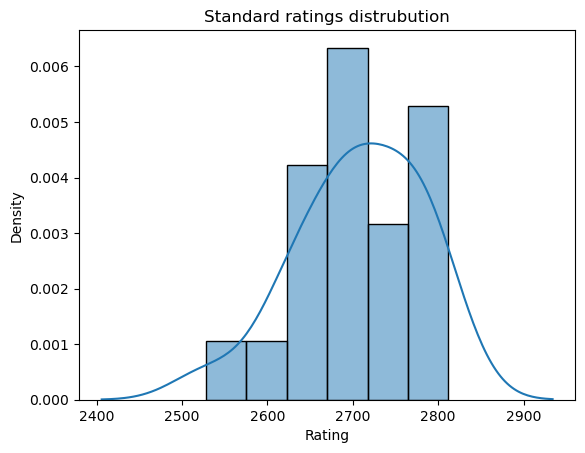

In [15]:
sns.histplot(
    best20['rating_standard'], kde=True,  
    stat="density", kde_kws=dict(cut=3)
)

plt.ylabel('Density') 
plt.xlabel('Rating')  
plt.title('Standard ratings distrubution') 

#Code source: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

The graph shows the standard rating distribution for all standard ratings of all players in January 2022. The curve shows us that the higher distribution is around 2650 and 2800. 

In [16]:
df89 = pd.DataFrame({'FEDERATION A': ['RUS','GER','USA','ESP', 'SRB','UKR', 'FRA', 'HUN', 'POL', 'IND', 'NED', 'CZE','CUB','ENG','ARG','ROU','COL','CRO','ITA'],

                     'FEDERATION B': ['RUS', 'FRA', 'USA', 'HUN','NED','POL', 'IND','ROU','ESP','UKR','CZE','GER','ENG','ARG','AUT','SRB','ITA','CUB','COL' ]})
df89   

,FEDERATION A,FEDERATION B
0,RUS,RUS
1,GER,FRA
2,USA,USA
3,ESP,HUN
4,SRB,NED
5,UKR,POL
6,FRA,IND
7,HUN,ROU
8,POL,ESP
9,IND,UKR


In [17]:
df89['FEDERATION A'] = df89['FEDERATION A'].astype('category').cat.codes
df89['FEDERATION B'] = df89['FEDERATION B'].astype('category').cat.codes
df89.corr()

,FEDERATION A,FEDERATION B
FEDERATION A,1.000000,0.587719
FEDERATION B,0.587719,1.000000


To contrast them, I measure the correlation between the best 20 ratings and the most common federation. No correlation was found.

# First of all, let’s focus on games played by WGM against each other; and let’s filter those games from 2016 onwards (i.e., aligning dates with the FIDE dataset).

In [3]:
df2 = pd.read_csv('games_wgm.csv') 

In [4]:
wgw_players = df2["wgm_username"].unique() #it gives the list of the WGM player to be serch in the data set.

In [5]:
filter_wgw = df2[(df2['white_username'].isin(wgw_players)) & (df2['black_username'].isin(wgw_players))]

In [6]:
filter_wgw_date = filter_wgw[(filter_wgw['end_time'] >= '2016-01-01') & (filter_wgw['end_time'] <= '2021-02-01')] 

In [7]:
filter_wgw_date_sorted = filter_wgw_date.sort_values('end_time')

In [8]:
filter_wgw_date_sorted_for_real = filter_wgw_date_sorted.drop_duplicates(['end_time'],keep='first') #drops duplicate and it prints only the first 20 player. 
filter_wgw_date_sorted_for_real

,game_id,game_url,pgn,time_control,end_time,rated,time_class,rules,wgm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
120449,2006765739,https://www.chess.com/live/game/2006765739,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2017-03-20 16:31:17,True,bullet,chess,kungmongmanh,kungmongmanh,2335,win,meoluoi91,2382,timeout
120450,2006768538,https://www.chess.com/live/game/2006768538,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2017-03-20 16:33:58,True,bullet,chess,kungmongmanh,meoluoi91,2389,win,kungmongmanh,2328,timeout
165259,2006771100,https://www.chess.com/live/game/2006771100,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2017-03-20 16:36:15,True,bullet,chess,meoluoi91,kungmongmanh,2337,win,meoluoi91,2380,checkmated
120452,2006773369,https://www.chess.com/live/game/2006773369,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2017-03-20 16:38:13,True,bullet,chess,kungmongmanh,meoluoi91,2387,win,kungmongmanh,2330,resigned
120453,2006775398,https://www.chess.com/live/game/2006775398,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2017-03-20 16:39:47,True,bullet,chess,kungmongmanh,kungmongmanh,2339,win,meoluoi91,2378,resigned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284162,5819450028,https://www.chess.com/live/game/5819450028,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120,2020-11-25 17:03:50,False,bullet,chess,checkitas,medalja,2449,win,checkitas,2249,timeout
284163,5819478975,https://www.chess.com/live/game/5819478975,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",120,2020-11-25 17:08:30,False,bullet,chess,checkitas,checkitas,2249,timeout,medalja,2449,win
284164,5819531008,https://www.chess.com/live/game/5819531008,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2020-11-25 17:14:33,False,bullet,chess,checkitas,medalja,2449,win,checkitas,2249,timeout
300202,6178765078,https://www.chess.com/live/game/6178765078,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2021-01-08 17:17:59,True,blitz,chess,martabartel,martabartel,2219,agreed,majoa88,2521,agreed


This table is the Chess.com data set filtered by only Master players, filtered and sorted by date.

# a) Which WGM played most games with other WGMs? Sort them in descending order. 

In [37]:
blackmatch = filter_wgw_date_sorted_for_real['white_username'].value_counts() #It counts the occurence of a value.
whitematch = filter_wgw_date_sorted_for_real['black_username'].value_counts()

In [38]:
fullmatches = (blackmatch + whitematch)

In [39]:
table = fullmatches.sort_values(axis=0, ascending=False)
table = table.fillna(1)

In [40]:
table

cukus              38.0
kungmongmanh       32.0
meoluoi91          19.0
martinique24       11.0
yennefer1          10.0
ntmh281             9.0
ahachess            9.0
ninullia            8.0
martabartel         7.0
axvesik             7.0
ticobello           7.0
meenakshiwgm        6.0
dey2580             5.0
zabivol_mc          4.0
vaishali2001        4.0
enkhtuul            4.0
lisychess           3.0
checkitas           3.0
medalja             3.0
elena1668           3.0
xuyuanyuan          3.0
xiaopang123         2.0
kopeisk81           2.0
onlytime4           2.0
ktsatsalashvili     2.0
majoa88             2.0
mirandamikadze      2.0
cruziana            1.0
jinbojinbo          1.0
koenigin94          1.0
mirochka            1.0
pandazero           1.0
phoenix_sjh         1.0
vwnv7               1.0
dtype: float64

The previus cell shows a pandas.core.series.serie with the players nickname to the left and the occurences of their matches on the right.
The WGW who played most its cukus alias Pepp Petra.

# b) Overall, have there been any surprising results in the games results? That is, at the time a game was played, has a player lost a game from a player with a lower FIDE rating?

In [105]:
surprising_results1 = full_ratings[(full_ratings['ID PLAYER'] == 717444)]

In [106]:
surprising_results2 = full_ratings[(full_ratings['ID PLAYER'] == 739049)]

/var/folders/tp/hw74g7jj5yx_h2wvpnjcg_t00000gn/T/ipykernel_59042/2966853019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surprising_results1[["rating_blitz"]] = surprising_results1[["rating_blitz"]].fillna(method='ffill') #There are some missing data on the data set. Thus, I give them a value of 0 the graph will look messy but we still have an idea of the rating.
/var/folders/tp/hw74g7jj5yx_h2wvpnjcg_t00000gn/T/ipykernel_59042/2966853019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surprising_

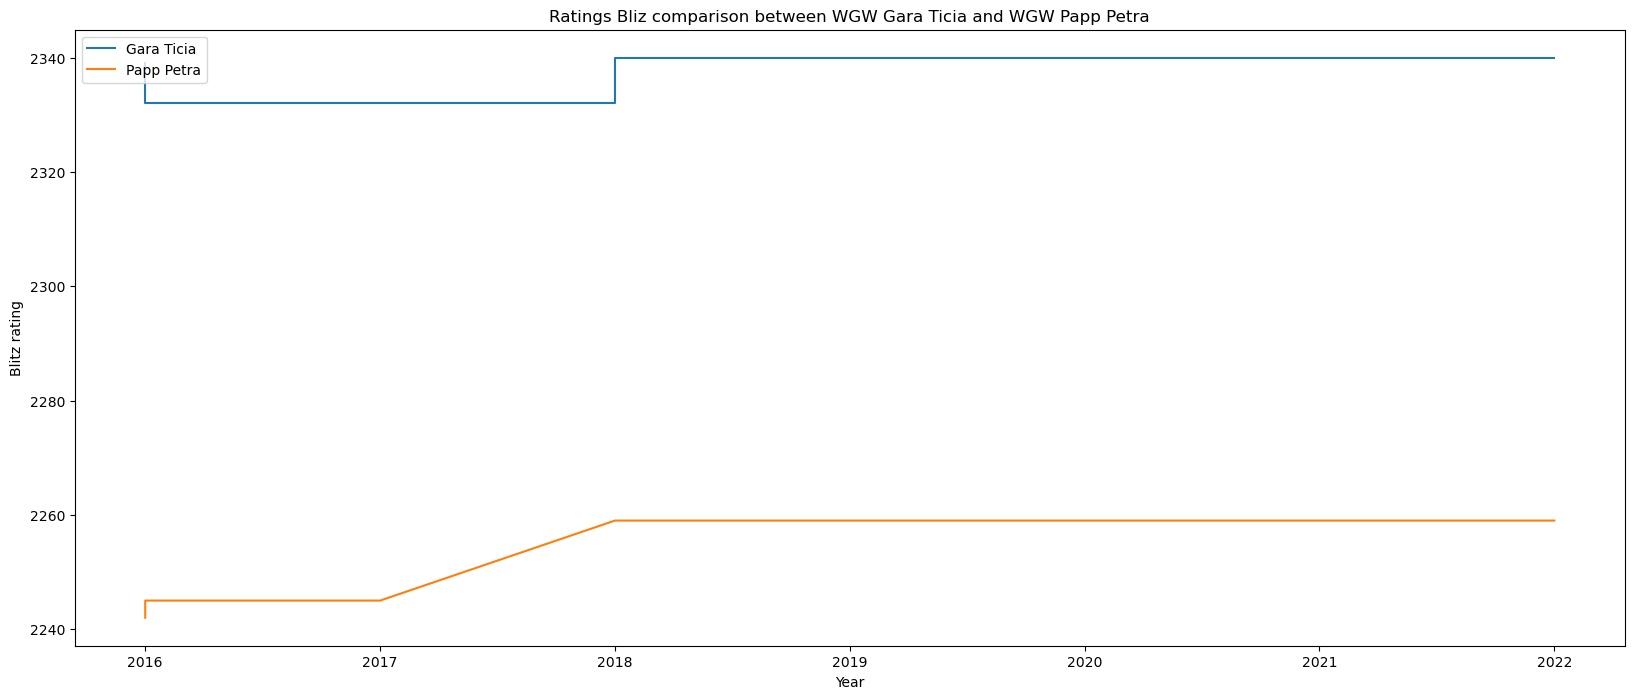

In [107]:
surprising_results1[["rating_blitz"]] = surprising_results1[["rating_blitz"]].fillna(method='ffill') #There are some missing data on the data set. Thus, I give them a value of 0 the graph will look messy but we still have an idea of the rating.
surprising_results2[["rating_blitz"]] = surprising_results2[["rating_blitz"]].fillna(method='ffill')

Gara_Ticia = surprising_results1 
Papp_Petra  = surprising_results2
Gara_Ticiaa = Gara_Ticia[["year", "rating_blitz"]] 
Papp_Petraa = Papp_Petra[["year", "rating_blitz"]] 

Gara_Ticiaa = Gara_Ticiaa.set_index("year")  
Papp_Petraa = Papp_Petraa.set_index("year") 


plt.figure(figsize = (20, 8))
plt.plot(Gara_Ticiaa.rating_blitz, label = "Gara Ticia")
plt.plot(Papp_Petraa.rating_blitz, label = "Papp Petra")


plt.xlabel("Year")
plt.ylabel("Blitz rating")
plt.title("Ratings Bliz comparison between WGW Gara Ticia and WGW Papp Petra", color = 'black') 

plt.legend(loc="upper left")
plt.show()

The graph shows that Gaia Ticia has a higher blitz rating over time than Pepp Petra.

In [108]:
it_does_not_mean = filter_wgw_date_sorted_for_real[(filter_wgw_date_sorted_for_real['white_username'] == 'ticobello') & (filter_wgw_date_sorted_for_real['black_username'] == 'cukus') & (filter_wgw_date_sorted_for_real['black_result'] == 'win')]
it_does_not_mean

,game_id,game_url,pgn,time_control,end_time,rated,time_class,rules,wgm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
213655,4653998911,https://www.chess.com/live/game/4653998911,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",300+3,2020-03-30 02:02:23,False,blitz,chess,ticobello,ticobello,2332,resigned,cukus,2434,win
83936,4654118361,https://www.chess.com/live/game/4654118361,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",300+3,2020-03-30 02:31:31,False,blitz,chess,cukus,ticobello,2332,resigned,cukus,2434,win


This table shows that Gara Ticia alias ticobello has lost some matches against Papp Petra alias cukuz, which in 2020 had a lower FIDE rating. Thus, a higher or lower FIDE rating cannot establish a priori the winner.

# Pick one or more pairs of WGM players who played more than 10 games and correlate their matches with their FIDE ratings over time.

In [109]:
df3 = pd.read_csv('mappings.csv')
df3

,id,username,fid,name
0,0,armqueen,13300270,Maria Gevorgyan
1,1,cukus,739049,Papp Petra
2,2,kungmongmanh,12401838,Thi Kim Phung Vo
3,3,dinabelenkaya,24142654,Dina Belenkaya
4,4,nemsko,505161,Nemo Zhou
5,5,irina_turova,4120876,Irina Turova
6,6,tomilen,4162340,Elena Tomilova
7,7,jenia84,14112035,Evgeniya Doluhanova
8,8,zefirka,14117258,"Babiy, Olga"
9,9,lizasolovyova,14117665,Elizaveta Malakhova


In [110]:
df___8 = filter_wgw_date_sorted_for_real[(filter_wgw_date_sorted_for_real['black_username'] == 'cukus') & (filter_wgw_date_sorted_for_real['black_result'] == 'win') | (filter_wgw_date_sorted_for_real['white_username'] == 'cukus') & (filter_wgw_date_sorted_for_real['white_result'] == 'win')]
Cukus_victory = len(df___8)
print("Cukus victory: " + (str(Cukus_victory)))

df___9 = filter_wgw_date_sorted_for_real[(filter_wgw_date_sorted_for_real['black_username'] == 'meoluoi91') & (filter_wgw_date_sorted_for_real['black_result'] == 'win') | (filter_wgw_date_sorted_for_real['white_username'] == 'meoluoi91') & (filter_wgw_date_sorted_for_real['white_result'] == 'win')]
Meoluoi91_victory = len(df___9)
print("Meoluoi91 victory: " + (str(Meoluoi91_victory)))

df___10 = filter_wgw_date_sorted_for_real[(filter_wgw_date_sorted_for_real['black_username'] == 'kungmongmanh') & (filter_wgw_date_sorted_for_real['black_result'] == 'win') | (filter_wgw_date_sorted_for_real['white_username'] == 'kungmongmanh') & (filter_wgw_date_sorted_for_real['white_result'] == 'win')]
kungmongmanh_victory = len(df___10)
print("kungmongmanh victory: " + (str(kungmongmanh_victory)))

Cukus victory: 18
Meoluoi91 victory: 12
kungmongmanh victory: 13


In [111]:
percentage = (Cukus_victory/38)*100
percentage

47.368421052631575

In [112]:
percentage = (Meoluoi91_victory/19)*100
percentage

63.1578947368421

In [113]:
percentage = (kungmongmanh_victory/32)*100
percentage

40.625

In [114]:
df___8[['end_time']].to_string(index=False) #Just to know the date that I need to refer.

'           end_time\n2017-08-08 04:41:13\n2017-08-08 04:43:14\n2017-08-08 04:47:56\n2017-08-10 23:17:45\n2017-08-10 23:23:26\n2017-08-10 23:25:43\n2017-08-10 23:30:27\n2017-08-10 23:34:47\n2020-03-30 02:02:23\n2020-03-30 02:31:31\n2020-03-30 02:48:23\n2020-04-13 03:20:59\n2020-04-13 03:32:17\n2020-04-14 03:20:19\n2020-04-14 03:32:02\n2020-04-14 03:43:16\n2020-06-20 19:33:15\n2020-06-21 23:30:29'

In [115]:
df___9[['end_time']].to_string(index=False)

'           end_time\n2017-03-20 16:33:58\n2017-03-20 16:38:13\n2017-03-20 16:42:03\n2017-03-20 16:44:28\n2017-03-20 16:46:41\n2018-07-11 01:20:34\n2020-04-04 15:13:48\n2020-04-11 14:48:00\n2020-04-26 15:23:49\n2020-06-20 20:09:24\n2020-06-22 21:37:50\n2020-06-23 21:52:14'

In [116]:
df___10[['end_time']].to_string(index=False)

'           end_time\n2017-03-20 16:31:17\n2017-03-20 16:36:15\n2017-03-20 16:39:47\n2017-08-08 04:38:38\n2017-08-08 04:45:36\n2017-08-10 23:15:44\n2017-08-10 23:20:11\n2017-08-10 23:21:01\n2017-08-10 23:28:02\n2017-08-13 02:49:25\n2017-08-13 02:51:19\n2017-08-13 02:52:36\n2020-04-11 15:31:44'

In [125]:
Papp_Petra = full_ratings[(full_ratings['ID PLAYER'] == 739049) & (full_ratings['year'] == 2018) & (full_ratings['month'] == 1) | 
                          (full_ratings['ID PLAYER'] == 739049) & (full_ratings['year'] == 2021) & (full_ratings['month'] == 1)]

In [126]:
Hoang_Thi_Bao_Tram = full_ratings[(full_ratings['ID PLAYER'] == 12401102) & (full_ratings['year'] == 2018) & (full_ratings['month'] == 1) |
                                  (full_ratings['ID PLAYER'] == 12401102) & (full_ratings['year'] == 2021) & (full_ratings['month'] == 1) ]

In [127]:
Thi_Kim_Phung_Vo = full_ratings[(full_ratings['ID PLAYER'] == 12401838) & (full_ratings['year'] == 2018) & (full_ratings['month'] == 1) ]

In [128]:
Papp_Petra[["rating_standard","rating_rapid",'rating_blitz']].mean()

rating_standard    2330.0
rating_rapid       2263.0
rating_blitz       2259.0
dtype: float64

In [123]:
Hoang_Thi_Bao_Tram[["rating_standard","rating_rapid",'rating_blitz']].mean()

rating_standard    2340.5
rating_rapid       2325.5
rating_blitz       2297.0
dtype: float64

In [129]:
Thi_Kim_Phung_Vo[["rating_standard","rating_rapid",'rating_blitz']].mean()

rating_standard    2425.0
rating_rapid       2266.0
rating_blitz       2320.0
dtype: float64

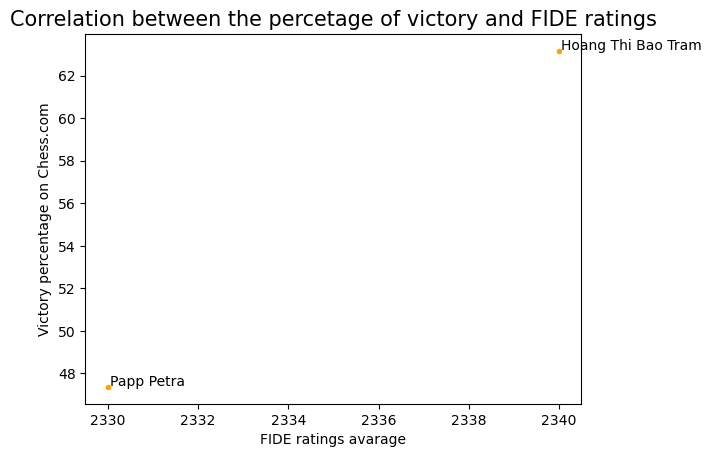

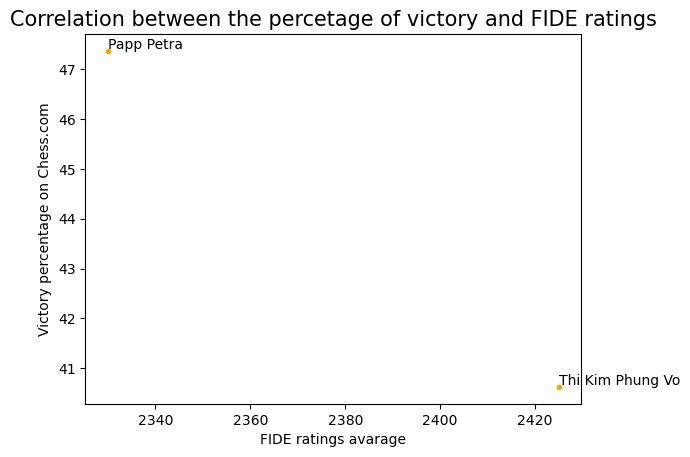

In [101]:
def plot_embeddings(M_reduced, word2Ind, words): #Setting the variable to define.
    for word in words:
        x, y = M_reduced[word2Ind[word]]
        plt.scatter(x, y, marker='.', color='orange') 
        plt.text(x+.05, y+.05, word, fontsize=10) #The size of the element of the graph. 
        plt.title(label="Correlation between the percetage of victory and FIDE ratings",
          fontsize=15,
          color="black")
        plt.xlabel("FIDE ratings avarage")
        plt.ylabel("Victory percentage on Chess.com")
    plt.show()

M_reduced_plot_test = np.array([[2330, 47.368421052631575], [2340, 63.1578947368421]]) #The point for each cross.
word2Ind_plot_test = {'Papp Petra': 0, 'Hoang Thi Bao Tram': 1} # the label fro each point. 
words = ['Papp Petra', 'Hoang Thi Bao Tram']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)

M_reduced_plot_test = np.array([[2330, 47.368421052631575], [2425, 40.625]]) #The point for each cross.
word2Ind_plot_test = {'Papp Petra': 0, 'Thi Kim Phung Vo': 1} # the label fro each point. 
words = ['Papp Petra', 'Thi Kim Phung Vo']
plot_embeddings(M_reduced_plot_test, word2Ind_plot_test, words)
#Code source: https://stackoverflow.com/questions/14432557/scatter-plot-with-different-text-at-each-data-point

There are two scatter plots; each graph contains two players and two variables. In the first graph, the players are Papp Petra, Hoang Thi Bao Tram, and the two variables are the mean of the FIDE standard ratings registered during their matches at chess.com, while the second variable is the percentage for each player winning matches at Chess.com. The players in the second graph are Papp Petra and Thi Kim Phung Vo, and the two variables are the same as in the first graph. In the first graph, we can notice that variables are positive correlate; in the second graph, we can acknowledge that variables are negative correlate. Then,  the mean of the standard ratings and the winning percentage of matches are not strongly correlated. Thus, we cannot draw any universal conclusion. 

# EXTRAs

In [183]:
minyob_GM = df_1['yob'].min() #min.() the minimum int in the yob column.
minyob_WGM = df_2['yob'].min() 
minyob_GM, minyob_WGM

(1922, 1921)

In [187]:
youngest_GM = df_1[(df_1['yob'] == 1922)] 
youngest_WGM = df_2[(df_2['yob'] == 1921)] 

In [188]:
youngest_WGM

,fide_id,name,federation,gender,title,yob
158479,4611870,"Keller-Hermann, Edith",GER,F,WGM,1921


Keller-Hermann Edith is the oldest WGM player.

In [186]:
youngest_GM 

,fide_id,name,federation,gender,title,yob
139514,4101529,"Averbakh, Yuri L",RUS,M,GM,1922


Averbakh Yuri is the oldest GM player.

In [189]:
gender = df['gender'].value_counts()
gender

M    388983
F     44405
Name: gender, dtype: int64

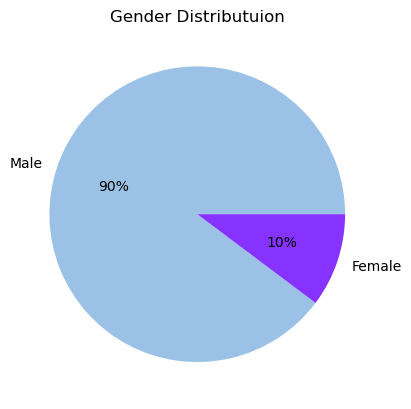

In [134]:
data = [388983, 44405]
labels = ['Male', 'Female']
colors = sns.color_palette('bright')[0:2]
plt.pie(data, labels = labels, colors = ["#9BC2E6", "#8633FF"], autopct='%1.0f%%')
plt.title("Gender Distributuion")
plt.show()
#Code Source: https://stackoverflow.com/questions/69305865/pie-chart-how-to-put-percentages-next-to-graph

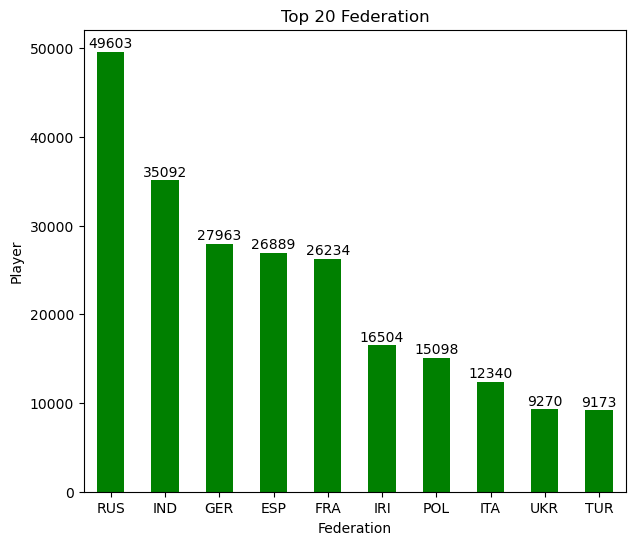

In [31]:
graph = df['federation'].value_counts().head(10) #I am refering to a specifi colomn FOR THE PLAYER FILE.
plt.figure(figsize=(7, 6)) 
ax = graph.plot(kind='bar', rot=0, color="g") # I am setting the type of graph and the color, and I refused to rotate the x label.
ax.set_title("Top 20 Federation", y = 1)
ax.set_xlabel('Federation') 
ax.set_ylabel('Player') 

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2 
    space = 1 
    label = format(y_value) 
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')  #setting other details.   
plt.show()

#Code source: https://stackoverflow.com/questions/70664177/better-way-to-plot-gender-count-using-python

On the given dataset only one every ten player its a woman. 

# Reflection

Overall, the statistical investigation gained good results. However, few points needs to be clarified.
The files that I used are from: the FIDE web site, Chess.com. The FIDE website is an official website for chess champions. On the other hand, Chess.com is a website that provide the user with a chess online game platform for anyone which wish to play chess. Both of them gather the data from their user. Nevertheless, both of the source contains a weakness. 
The FIDE data set contains Nan values; thus, the file quality is low because Nan values may have led to errors or impossibility of a complete analysis. Further, Chess.com does not contain authentic data, for example, users can possess multiple accounts. Therefore, the analysis could provide fake insights.
One of the main weakness of the code its the explanation of it. If you wish I can explain to you viva voce but I am like this does this that does that 0 or 1 must be.

# Conclusion

In conclusion, the project reached its aims, and it is full of useful contents such as: 
- Full questions answered.
- Concatenation, filtering, cleaning, and serching within and with different data sets.
- Many tables, ranks and graphs.
- Use of the Mean, Maxium, Minimum, Standard deviation, Variance, and more.
- And many others little things.

Alert:
The project has only a demonstrative end. I do not take any responsibility for any unauthorized use. Further, you must not share it without the consent of the author. You may end up persecute by the law.

In [16]:
with open('NCHAI759_AE1.ipynb') as json_file:
    data = json.load(json_file)

print(data)

{'cells': [{'cell_type': 'markdown', 'id': 'c5fb45b0', 'metadata': {}, 'source': ["# AE1, Queen's Gambit"]}, {'cell_type': 'code', 'execution_count': 1, 'id': 'f7a1eebe', 'metadata': {}, 'outputs': [], 'source': ['import pandas as pd  \n', 'import numpy as np\n', 'import matplotlib.pyplot as plt\n', 'import seaborn as sns\n', 'import json\n', '#This cell imports all the libraries that I will use.']}, {'cell_type': 'markdown', 'id': 'cc2b39cd', 'metadata': {}, 'source': ['# Who are the youngest players to hold the title of Grand Master (GM) and Woman Grand Master (WGM)?']}, {'cell_type': 'code', 'execution_count': 23, 'id': '391f7861', 'metadata': {}, 'outputs': [], 'source': ['df = pd.read_csv("players-1.csv") #It reads the csv file  \n', '#Code source: https://www.w3schools.com/python/pandas/pandas_csv.asp']}, {'cell_type': 'code', 'execution_count': 13, 'id': 'f349a56f', 'metadata': {}, 'outputs': [], 'source': ["df_1 = df[(df['title'] == 'GM')]#It filter the data by title.\n", '#Cod

In [17]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "code":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
print(wordCount)
#work count for code.

1566


In [18]:
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
print(wordCount)
#word count headings.
#Code source: https://stackoverflow.com/questions/71194571/word-count-of-markdown-cells-in-jupyter-notebook

932


In [19]:
x = 1566+932
print('Total word count: ' + str(x))

Total word count: 2498
